Welcome to the tutorial! In this tutorial I will explore problem solving capabilities of a particle swarm algorithm through an example problem. The example problem, z = sin(x)*sin(5x)*.1x^2 + sin(y)*sin(5y*) + .1*y^2, is a complicated function with infinite local maximums and minimums. The algorithm will search for the absolute minimum which will occur at x = +- .96, y = +- .96, z = 1.4478. The function can be seen graphed below. 

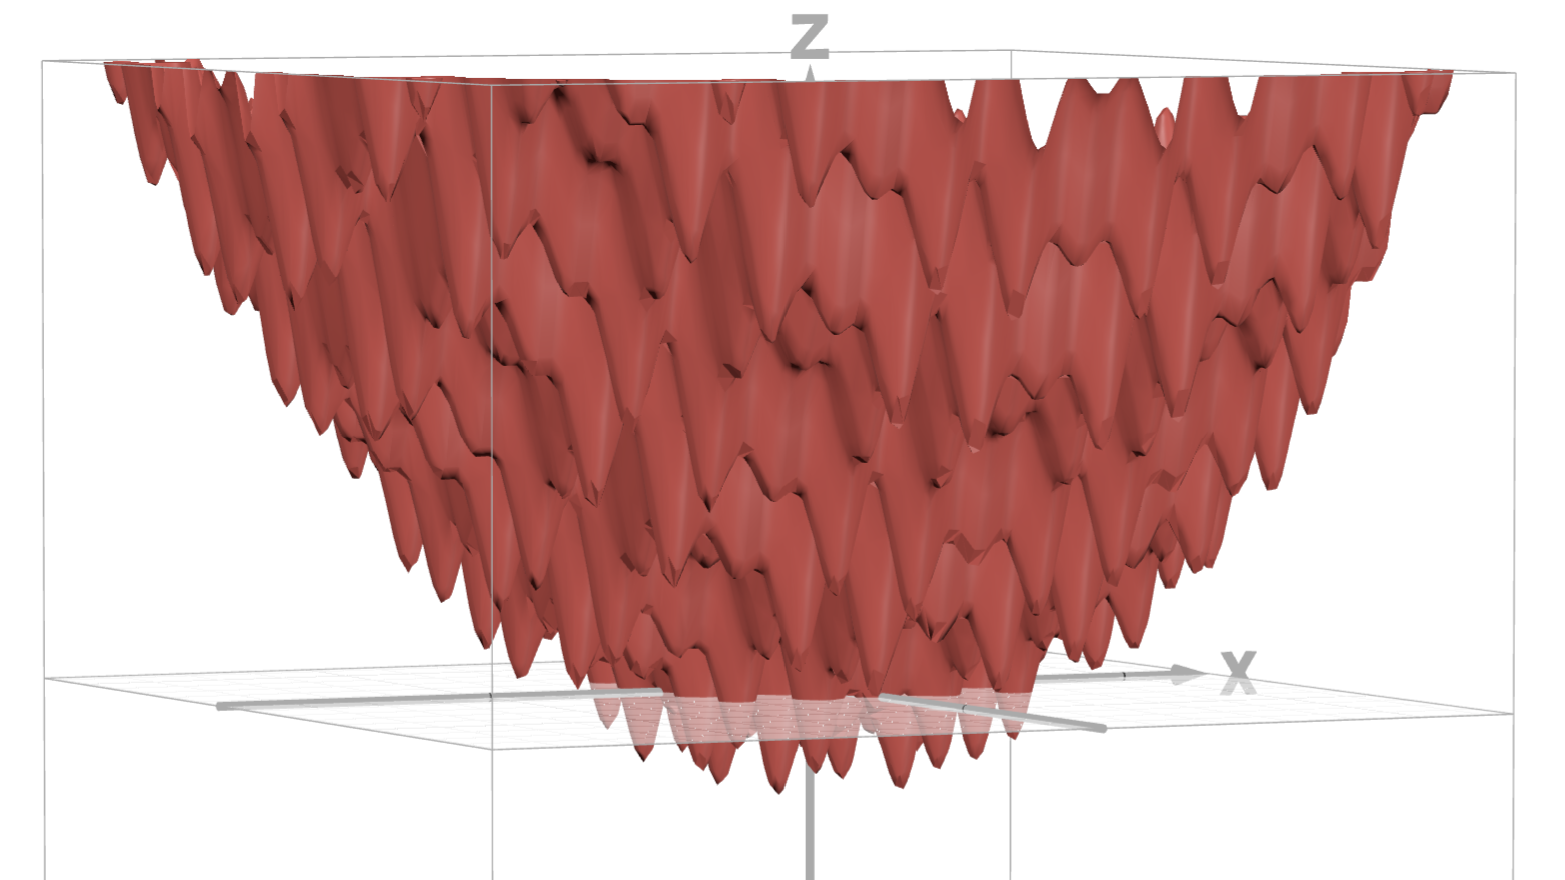

A particle swarm algorithm works by initially placing "particles" or potential solutions at random places in the bounds given for the potential optimal solution. The "particles" are also given an initial velocity at which they are to move in the potential solution space. At each iteration in the program, the particles will change their velocity based on the below equation.

        cognitive = c1 * r1 * (self.best_position - self.position)     #amount that new velocity tends towards personal best 
        social = c2 * r2 * (global_best_position - self.position)		#amount that new velocity tends towards group best
        self.velocity = w * self.velocity + cognitive + social	        #also a weight towards current velocity

As the notes indicate, the new velocity and therefor the new tested solution will be a combination of the individual particles personal best, the best result of the entire group of particles and the velocity of the particle before the current iteration. Changing the c1, c2 and w coefficients will alter the algrithms reliance on any one of these given catagories. Increaing "w" for example will force the algorithm to search wider for solutions and converge less quickly, but maybe find soltuions it otherwise would have missed. 

Another important factor is the randomness associated with a particle swarm algorithm. All particles are initially released at random locations at random velocities. Next there are coefficients r1 and r2 above that lead to a random weighting for the cognitive and social dependence on the model. This element of randomness helps the algorithm find additional solutions that other types of optimization algorithms might miss. 



The cell below runs the algorithm and plots the best solution found on the y-axis and the iterations on the x-axis. This shows how quickly the algorithm can converge on a solution even in very complex space. 

Iteration 1/50 - Best Score: 0.12925
Iteration 2/50 - Best Score: -0.71177
Iteration 3/50 - Best Score: -1.04247
Iteration 4/50 - Best Score: -1.38670
Iteration 5/50 - Best Score: -1.38670
Iteration 6/50 - Best Score: -1.38670
Iteration 7/50 - Best Score: -1.38670
Iteration 8/50 - Best Score: -1.38670
Iteration 9/50 - Best Score: -1.38670
Iteration 10/50 - Best Score: -1.38670
Iteration 11/50 - Best Score: -1.39971
Iteration 12/50 - Best Score: -1.39971
Iteration 13/50 - Best Score: -1.40178
Iteration 14/50 - Best Score: -1.40178
Iteration 15/50 - Best Score: -1.44069
Iteration 16/50 - Best Score: -1.44069
Iteration 17/50 - Best Score: -1.44069
Iteration 18/50 - Best Score: -1.44634
Iteration 19/50 - Best Score: -1.44634
Iteration 20/50 - Best Score: -1.44671
Iteration 21/50 - Best Score: -1.44671
Iteration 22/50 - Best Score: -1.44760
Iteration 23/50 - Best Score: -1.44760
Iteration 24/50 - Best Score: -1.44761
Iteration 25/50 - Best Score: -1.44761
Iteration 26/50 - Best Score: -1.44

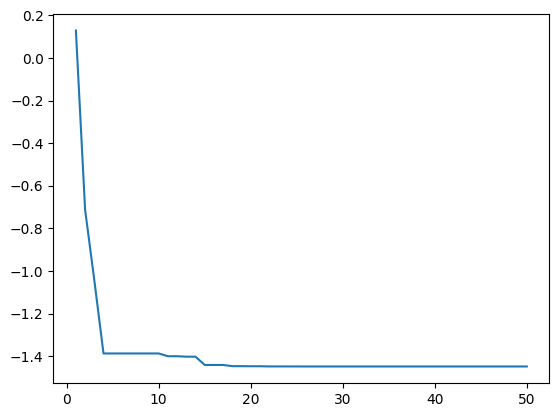

In [10]:
import particle_swarm as ps
import numpy as np
import matplotlib.pyplot as plt

def complex_function(x):
    return np.sum(np.sin(x)*np.sin(5*x)+.1*x**2)


func = complex_function 
dim = 2
bounds=  (-10, 10)
num_particles = 10 
max_iter = 50 
w = 0.5
c1 = 1
c2 = 2


pso = ps.PSO(func, dim, bounds, num_particles, max_iter, w, c1, c2)
best_position, best_score, iteration_list, best_list, position_matrix = pso.optimize()
print(f"\nBest position found: {best_position}")
print(f"Best score: {best_score}")


plt.plot(iteration_list,best_list)


This next example shows visually how adjusting the inertial, social and cognitive weights on the algorithm impacts the path of the individual particles. I have plotted the location of each particle for each iteration. It is interestingt to watch the particles converge on a solution, but still occasionally jump out to search additional solution space. 

I encourage the user of this tutorial to adjust the w, c1 and c2 variables below to see how the particle pathes are changed. For example, change w to w=5 and watch the particles hang out at the maximum of the bounds without converging. The plotting will require you to download the code and run all cells in this notebook 

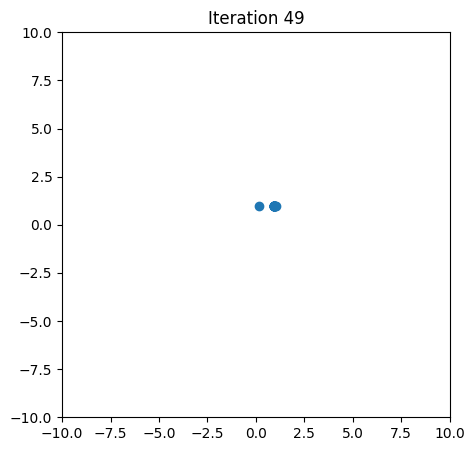


Best position found: [0.96095065 0.9609536 ]
Best score: -1.4477992686481906


In [12]:
import particle_swarm as ps
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

def complex_function(x):
    return np.sum(np.sin(x)*np.sin(5*x)+.1*x**2)


func = complex_function 
dim = 2
bounds=  (-10, 10)
num_particles = 30 
max_iter = 50 


#Change these variables to see how the inertial, social, and cognitive variables impact performace of the algo
w = .5    #inertial weight
c1 = 1    #cognative, weight for personal best
c2 = 2    #social, weight for group best result


pso = ps.PSO(func, dim, bounds, num_particles, max_iter, w, c1, c2)
best_position, best_score, iteration_list, best_list, position_matrix = pso.optimize()

for i in range(max_iter):
    # Clear previous output (plot)
    clear_output(wait=True)

    index = i*dim

    # Update data
    positions = position_matrix[:,index:index+dim]
    

    # Plot
    plt.figure(figsize=(5, 5))
    plt.scatter(positions[:, 0], positions[:, 1])
    plt.xlim(bounds)
    plt.ylim(bounds)
    plt.title(f"Iteration {i}")
    plt.show()

    # Small delay
    time.sleep(0.1)
    
print(f"\nBest position found: {best_position}")
print(f"Best score: {best_score}")


In conclusion, particle swarm algorithms can be very powerful tools for solving complex, multidimensional problems. It is important to understand what the potential solution space looks like inorder to tune certain variables that impact how the particles search the solution space. As you run the above code you will also notice how quickly it runs. This is a big additional advantage of this type of optimization algorithm. 